In [1]:
pip install nltk textblob wordcloud

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import words, wordnet, names,stopwords
import numpy as np
from nltk.stem import PorterStemmer, WordNetLemmatizer
import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [6]:
def clean_text(text):
    # Remove non-printable characters
    text = re.sub(r'[\x00-\x1F\x7F]', '', text)
    
    # Remove emojis and other non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]', '', text)
    
    return text

with open('C:/Users/User/Downloads/archive/Tokenized.txt', 'r', encoding ='utf-8') as file:
    words1 = [line.strip().split('\t') for line in file if line.strip() != '' and len(line.strip()) > 1]

# Create dataframe from the imported file    
df = pd.DataFrame(words1)

# Assigning Column Name for the dataframe
df.columns = ['Words','Frequency']

In [7]:
df

,Words,Frequency
0,a,138
1,aa,2
2,aaa,1
3,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafter,1
4,aaaaaaaaaaaaaaaaaaaaaah,1
...,...,...
469285,zzzzzs,1
469286,zzzzzzmm,1
469287,zzzzzzzoooooooooooooooooooooooooooooooooooommmmm,1
469288,zzzzzzzzzzap,1


In [8]:
# Download the necessary corpora if you haven't already
nltk.download('words')
nltk.download('wordnet')
nltk.download('names')
nltk.download('stopwords')

# Get words from the general word list
general_words = set(words.words())

# Get words from WordNet
wordnet_words = set(wordnet.words())

# Get names from the names corpus (both male and female names)
name_words = set(names.words())

stop_words = set(stopwords.words())
# Combine all the word sets
word_set = general_words.union(wordnet_words).union(name_words)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_word(word):
    # Convert to lowercase
    word = word.lower()

    # Remove non-alphanumeric characters
    word = re.sub(r'[^a-zA-Z0-9]', '', word)

    # Handle accents and diacritics
    word = unidecode.unidecode(word)

    # Stemming
    word = stemmer.stem(word)

    # Lemmatization
    word = lemmatizer.lemmatize(word)

    # Reduce sequences of repeated characters
    normalized_double = re.sub(r'(.)\1{2,}', r'\1\1', word)
    if normalized_double in word_set:
        return normalized_double
    normalized_single = re.sub(r'(.)\1+', r'\1', word)
    return normalized_single if normalized_single in word_set else normalized_single

# Apply the normalization function to the 'Words' column
df['Words'] = df['Words'].apply(normalize_word)

# Convert 'Frequency' to integer
df['Frequency'] = df['Frequency'].astype(int)

# Filter out stop words
df = df[~df['Words'].isin(stop_words)]

print(df)


          Words  Frequency
1            aa          2
2            aa          1
4           aah          1
5          acan          1
6       amazing          1
...         ...        ...
469285        z          1
469286       zm          1
469287      zom          1
469288      zap          1
469289      zap          1

[467748 rows x 2 columns]


In [10]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment analysis function to the 'Words' column
df['Sentiment'] = df['Words'].apply(get_sentiment)

print(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


          Words  Frequency Sentiment
1            aa          2   neutral
2            aa          1   neutral
4           aah          1   neutral
5          acan          1   neutral
6       amazing          1  positive
...         ...        ...       ...
469285        z          1   neutral
469286       zm          1   neutral
469287      zom          1   neutral
469288      zap          1   neutral
469289      zap          1   neutral

[467748 rows x 3 columns]


C:\Users\User\AppData\Local\Temp/ipykernel_23696/1794252456.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Words'].apply(get_sentiment)


In [11]:
# Group by the 'Words' column and sum the 'Frequency'
df_grouped = df.groupby('Words', as_index=False).agg({'Frequency': 'sum'})

# Sort the DataFrame by 'Frequency' in descending order (optional)
df_grouped = df_grouped.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
# Apply the sentiment analysis function to the 'Words' column
df_grouped['Sentiment'] = df_grouped['Words'].apply(get_sentiment)

In [13]:
print(df_grouped[:100])

      Words  Frequency Sentiment
0       thi    6521650   neutral
1        wa    3338908   neutral
2      work    3071313   neutral
3       use    3024896   neutral
4     great    2119338  positive
..      ...        ...       ...
95  without     417978   neutral
96   router     412184   neutral
97   expect     411991   neutral
98      far     406937  positive
99     fast     406878  positive

[100 rows x 3 columns]


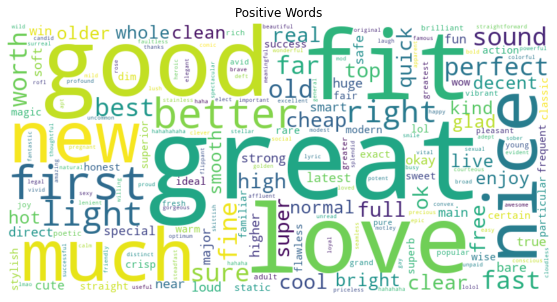

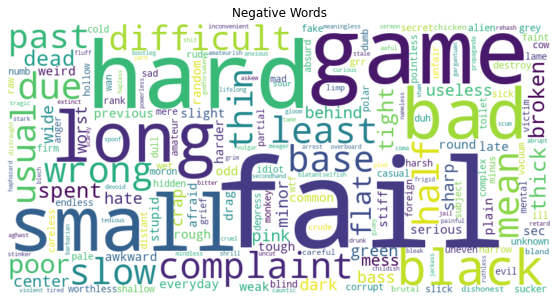

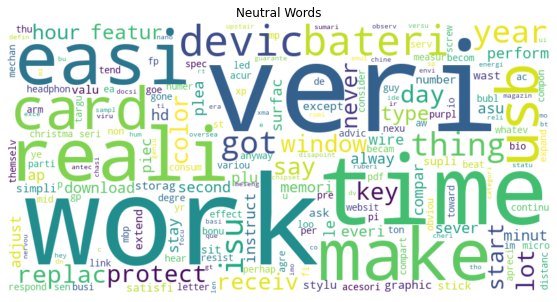

In [14]:


# Sort the DataFrame by 'Frequency' in descending order
df_grouped = df_grouped.sort_values(by='Frequency', ascending=False)

for sentiment in ['positive', 'negative', 'neutral']:
    # Select the top 50 most frequent words for each sentiment
    top_words = df_grouped[df_grouped['Sentiment'] == sentiment]
    
    words = ' '.join(top_words['Words'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment.capitalize()} Words')
    plt.show()


In [15]:
# Split the DataFrame based on the 'Sentiment' column
df_positive = df_grouped[df_grouped['Sentiment'] == 'positive'].sort_values(by='Frequency', ascending=False).reset_index(drop=True)
df_negative = df_grouped[df_grouped['Sentiment'] == 'negative'].sort_values(by='Frequency', ascending=False).reset_index(drop=True)
df_neutral = df_grouped[df_grouped['Sentiment'] == 'neutral'].sort_values(by='Frequency', ascending=False).reset_index(drop=True)


In [22]:
df_positive[:10]

,Words,Frequency,Sentiment
0,great,2119338,positive
1,good,1516542,positive
2,love,1021799,positive
3,fit,847985,positive
4,much,724791,positive
5,nice,724598,positive
6,new,653396,positive
7,first,559534,positive
8,better,542913,positive
9,light,478419,positive


In [23]:
df_negative[:10]

,Words,Frequency,Sentiment
0,hard,480487,negative
1,game,424946,negative
2,small,371131,negative
3,long,338219,negative
4,bad,231882,negative
5,black,144147,negative
6,complaint,141277,negative
7,least,126216,negative
8,wrong,121826,negative
9,fail,120718,negative


In [24]:
df_neutral[:10]

,Words,Frequency,Sentiment
0,thi,6521650,neutral
1,wa,3338908,neutral
2,work,3071313,neutral
3,use,3024896,neutral
4,one,2079623,neutral
5,veri,2035170,neutral
6,case,1655271,neutral
7,like,1633638,neutral
8,would,1495495,neutral
9,get,1494529,neutral


In [19]:
# Map sentiments to numerical values
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df_grouped['Sentiment_Score'] = df_grouped['Sentiment'].map(sentiment_mapping)


# Filter top 100 words for each sentiment
top_positive = df_grouped[df_grouped['Sentiment'] == 'positive'].head(100)
top_negative = df_grouped[df_grouped['Sentiment'] == 'negative'].head(100)
top_neutral = df_grouped[df_grouped['Sentiment'] == 'neutral'].head(100)

# Compute the sum of sentiment scores for top 100 words of each sentiment
positive_score_sum = (top_positive['Sentiment_Score'] * top_positive['Frequency']).sum()
negative_score_sum = (top_negative['Sentiment_Score'] * top_negative['Frequency']).sum()
neutral_score_sum = (top_neutral['Sentiment_Score'] * top_neutral['Frequency']).sum()

# Compute the average sentiment score
overall_sentiment_score = (positive_score_sum + negative_score_sum + neutral_score_sum)/((top_positive['Frequency']).sum()+(top_negative['Frequency']).sum()+(top_neutral['Frequency']).sum())

print(f"Overall Sentiment Score: {overall_sentiment_score:.2f}")
if overall_sentiment_score > 0:
    print("The overall sentiment is POSITIVE.")
elif overall_sentiment_score < 0:
    print("The overall sentiment is NEGATIVE.")
else:
    print("The overall sentiment is NEUTRAL.")

Overall Sentiment Score: 0.12
The overall sentiment is POSITIVE.


In [20]:
# Map sentiments to numerical values
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df_grouped['Sentiment_Score'] = df_grouped['Sentiment'].map(sentiment_mapping)


# Filter dataframe for each sentiment
top_positive = df_grouped[df_grouped['Sentiment'] == 'positive']
top_negative = df_grouped[df_grouped['Sentiment'] == 'negative']
top_neutral = df_grouped[df_grouped['Sentiment'] == 'neutral']

# Compute the sum of sentiment scores for top 100 words of each sentiment
positive_score_sum = (top_positive['Sentiment_Score'] * top_positive['Frequency']).sum()
negative_score_sum = (top_negative['Sentiment_Score'] * top_negative['Frequency']).sum()
neutral_score_sum = (top_neutral['Sentiment_Score'] * top_neutral['Frequency']).sum()

# Compute the average sentiment score
overall_sentiment_score = (positive_score_sum + negative_score_sum + neutral_score_sum)/((top_positive['Frequency']).sum()+(top_negative['Frequency']).sum()+(top_neutral['Frequency']).sum())

print(f"Overall Sentiment Score: {overall_sentiment_score:.2f}")
if overall_sentiment_score > 0:
    print("The overall sentiment is POSITIVE.")
elif overall_sentiment_score < 0:
    print("The overall sentiment is NEGATIVE.")
else:
    print("The overall sentiment is NEUTRAL.")

Overall Sentiment Score: 0.06
The overall sentiment is POSITIVE.
